In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im = Image.open('image.jpg')

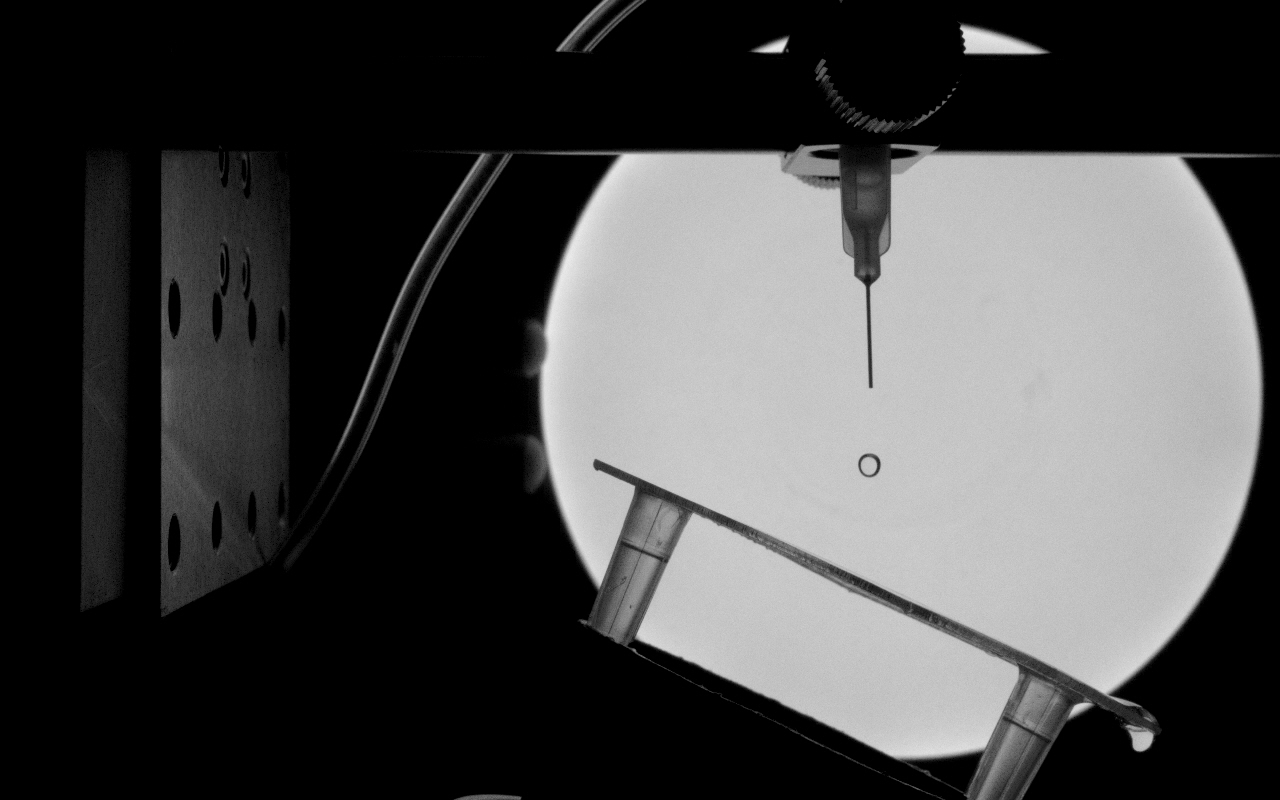

In [3]:
im

In [4]:
im.size

(1280, 800)

In [7]:
image = plt.imread('image.jpg')
type(image)

numpy.ndarray

In [8]:
image.shape

(800, 1280)

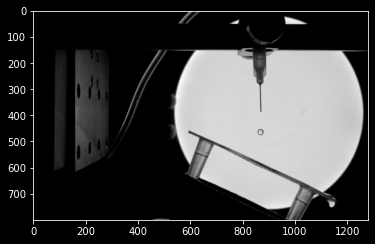

In [12]:
plt.imshow(image, cmap='gray')

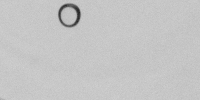

In [91]:
x0 = 800
y0 = 450
drop = im.crop((x0, y0, 1000, 550))
drop_np = np.asarray(drop)
drop

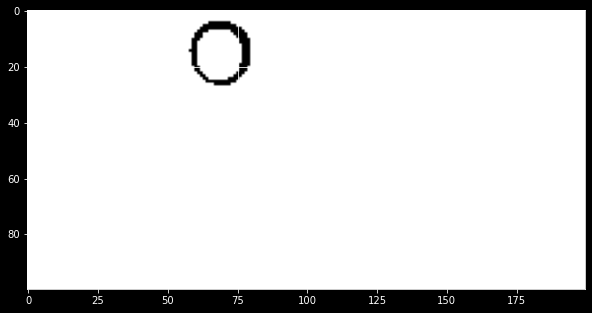

In [92]:
drop_np_f = (drop_np>110).astype(int)
plt.figure(figsize=(10,10))
plt.grid()
# plt.imshow(drop_np, cmap='gray')
plt.imshow(drop_np_f, cmap='gray')

In [93]:
skip = 0
xs = drop_np_f.argmin(axis=0)[skip:]
xss = np.nonzero(xs)
xl = skip+ xss[0][0]
xr = skip+ xss[0][-1]
xl, xr

(58, 79)

In [94]:
skip = 50
ys = drop_np_f.argmin(axis=1)[:-skip]
yss = np.nonzero(ys)
yu = yss[0][0]
yd = yss[0][-1]
yu, yd

(4, 26)

In [95]:
r1 = (xl+xr)/2
r2 = (yu+yd)/2
r = (r1+r2)/2
x = int(x0 + r)
y = int(y0 + r)
x, y

(841, 491)